# 🎯 🧑‍🔬 **Tutorial de Cirq**
¡Bienvenido a este tutorial práctico sobre **Cirq**, una biblioteca de Python para computación cuántica!
Aprenderás a construir circuitos, simular resultados, y explorar funciones avanzadas. 🚀
---

## https://quantumai.google/cirq/start/basics

# 🔹 **1. Instalación**

### Si no tienes Cirq instalado puedes hacerlo mediante pip

In [488]:
# !pip install cirq

# 🔹 **2. Imports**

In [489]:
import cirq


# 🔹 **3. Creación de Qubits**

### Cirq usa las clases `cirq.NamedQubit` y `cirq.LineQubit` para representar los qubits
### Creamos un qubit

In [490]:
# Crear un qubit con nombre q1
qubit = cirq.NamedQubit("q1")
print(f"Qubit: {qubit}")

q3 = cirq.LineQubit(3)
print(f"Qubit: {q3}")


Qubit: q1
Qubit: q(3)


### Crear varios qubits a la vez mediante `cirq.LineQubit`

In [491]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(f"Range de Qubits: {q0}, {q1}, {q2}")


qubits = cirq.LineQubit.range(5)
print(f"Range de Qubits en una lista: {qubits}")

Range de Qubits: q(0), q(1), q(2)
Range de Qubits en una lista: [cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4)]


###  Podemos crear qubits en una grid 

In [492]:
# De forma individual
q4_5 = cirq.GridQubit(4, 5)
print(f"Qubit: {q4_5}")

# Crear un cuadrado de 4x4 de qubits
qubits = cirq.GridQubit.square(4)
print(f"Qubits: {qubits}")

Qubit: q(4, 5)
Qubits: [cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2), cirq.GridQubit(2, 3), cirq.GridQubit(3, 0), cirq.GridQubit(3, 1), cirq.GridQubit(3, 2), cirq.GridQubit(3, 3)]


# 🔹 **4. Circuitos**

### Los circuitos se construyen mediante la clase `cirq.Cirquit`

In [493]:
# Crear un circuito
circuit = cirq.Circuit()

### Podemos añadir gates como la de Hadamard y medir qubits

In [494]:
# Añadimos Hadamard gate
circuit.append(cirq.H(qubit))

# Añadimos una medida del qubit
circuit.append(cirq.measure(qubit, key="result"))


### Visualización de circuitos en texto

In [495]:
print(circuit)

q1: ───H───M('result')───


### Visualización gráfica de circuitos 

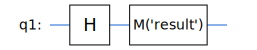

In [496]:
from cirq.contrib.svg import SVGCircuit

SVGCircuit(circuit)

# 🔹 **5. Gates**

### Para realizar operaciones sobre los qubits la librería de Circ dispone de una amplia variedad de Gates
### https://quantumai.google/cirq/build/gates
### 5.1 Single Qubits

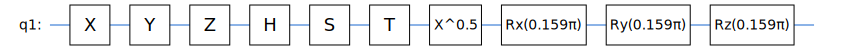

In [497]:
circuit = cirq.Circuit()
# Pauli gates
circuit.append(cirq.X(qubit))
circuit.append(cirq.Y(qubit))
circuit.append(cirq.Z(qubit))
# Clifford gates
circuit.append(cirq.H(qubit))
circuit.append(cirq.S(qubit))
circuit.append(cirq.T(qubit))
# Raíz de X
circuit.append(cirq.X(qubit)**0.5)
# Gates de rotación
circuit.append(cirq.rx(0.5)(qubit))
circuit.append(cirq.ry(0.5)(qubit))
circuit.append(cirq.rz(0.5)(qubit))

SVGCircuit(circuit)


### 5.2 2-Qubit Gates

2-qubit gates:


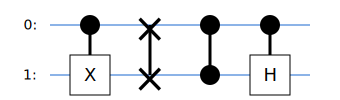

In [498]:
circuit = cirq.Circuit()
# CNOT gate
circuit.append(cirq.CNOT(q0, q1))
# SWAP gate
circuit.append(cirq.SWAP(q0, q1))
# Controlled-Z gate
circuit.append(cirq.CZ(q0, q1))
# Controlled-H gate
circuit.append(cirq.ControlledGate(cirq.H, num_controls=1)(q0, q1))

print("2-qubit gates:")
SVGCircuit(circuit)

### 5.3 3-Qubit Gates

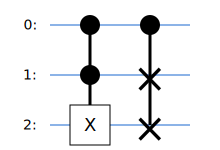

In [499]:
circuit = cirq.Circuit()
# Toffoli gate
circuit.append(cirq.TOFFOLI(q0, q1, q2))
# Fredkin gate
circuit.append(cirq.FREDKIN(q0, q1, q2))

SVGCircuit(circuit)

# 🔹 **6. Medir un Qubit**


### Para medir un Qubit se usa la función `cirq.measure` 

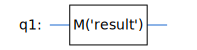

In [500]:
circuit = cirq.Circuit()
circuit.append(cirq.measure(qubit, key="result"))
SVGCircuit(circuit)

# 🔹 **7. Devices**

### Cirq posee la capacidad de cargar simulaciones de dispositivos reales
### Por ejemplo, el Google Sycamore processor mediante `cirq_google.Sycamore`

In [501]:
import cirq_google
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

## 🔹 **7.1 Restricciones de dispositivos cuánticos en Cirq**

### Los dispositivos cuánticos reales tienen restricciones de hardware que afectan cómo se diseñan los circuitos cuánticos. Estas restricciones incluyen:

 - Conectividad: no todos los qubits pueden interactuar directamente.
 - Tiempos de compuerta y errores: dependen de las características del dispositivo.

### En este ejemplo, veremos cómo Cirq maneja estas restricciones al validar circuitos con operaciones entre qubits no adyacentes.

In [502]:
# Crear 3 qubits
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

###  Crear una operación válida entre q0 y q1 (adjacentes)

Valid circuit with adjacent qubits: None


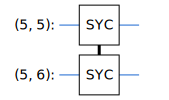

In [503]:
# Operación entre qubits adyacentes
adjacent_op = cirq_google.SYC(q0, q1)

# Crear un circuito con la operación
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)
print(f"Valid circuit with adjacent qubits: {valid}")
SVGCircuit(working_circuit)



### Crear una operación inválida entre q0 y q2 (no adjacentes)

In [504]:
# Operación entre qubits no adyacentes
nonadjacent_op = cirq_google.SYC(q0, q2)

# Crear un circuito con la operación
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print("But an invalid circuit raises an error.")
    print(e)

But an invalid circuit raises an error.
Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


# 🔹 **8. Simulación de circuitos**

### La simulación se lleva a acabo mediante la clase `cirq.Simulator`.
### Es similar al Qiskit's Aer simulator.

In [505]:

# Crear un simulador
simulator = cirq.Simulator()

# Ejecutar el circuito en el simulador
result = simulator.run(circuit, repetitions=10)

print("Resultados de simulación:")
print(result)


Resultados de simulación:
result=0000000000


## 8.2 Visualización de los resultados de la simulación
### Mediante matlab podemos visualizarlo

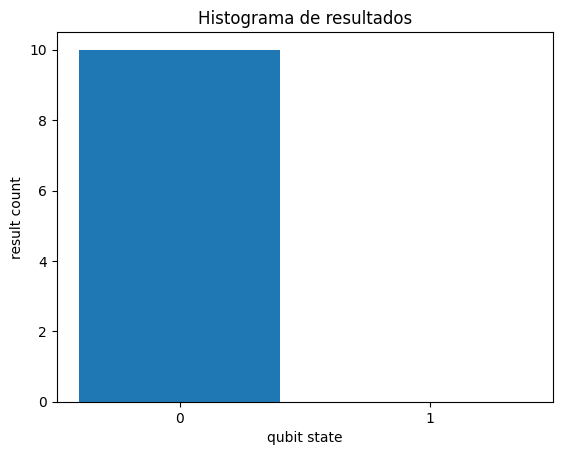

In [506]:
import matplotlib.pyplot as plt

# Histograma de resultados
cirq.plot_state_histogram(result, plt.subplot())
plt.title("Histograma de resultados")
plt.show()

# 🔹 **9. Circuitos Multi-Quubit** 

### Cirq permite crear circuitos multi-qubit
### Vamos a implementar un Circuito 2-Qubit Bell State

Circuito Bell State:


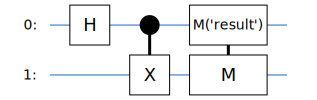

In [507]:
# Crear 2 qubits
q0, q1 = cirq.LineQubit.range(2)

# Crear Bell state circuit
bell_circuit = cirq.Circuit(
    cirq.H(q0),  # Hadamard gate
    cirq.CNOT(q0, q1),  # CNOT gate
    cirq.measure(q0, q1, key="result"),  # Mediciones
)

print("Circuito Bell State:")
#print(bell_circuit)
SVGCircuit(bell_circuit)


### Simulación Bell State

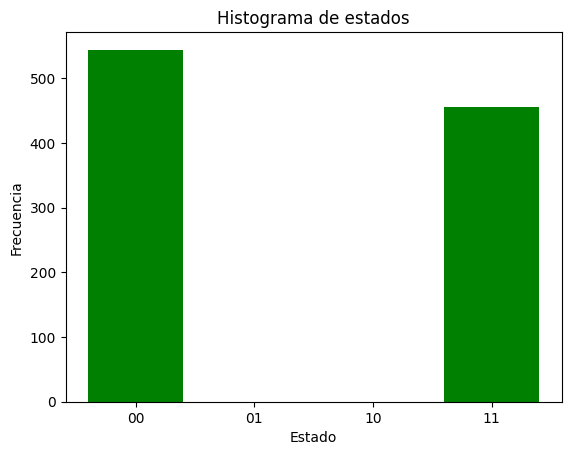

In [508]:
bell_result = simulator.run(bell_circuit, repetitions=1000)

#print("Bell state simulation results:")
#print(bell_result)

# Plot the histogram of results
cirq.plot_state_histogram(bell_result, plt.subplot())
plt.xticks([0, 1, 2, 3], ["00", "01", "10", "11"])
plt.ylabel("Frecuencia")
plt.xlabel("Estado")
plt.title("Histograma de estados")
plt.bar([0, 1, 2, 3], [bell_result.histogram(key="result")[0], bell_result.histogram(key="result")[1], bell_result.histogram(key="result")[2], bell_result.histogram(key="result")[3]], color='g')
plt.show()


Counter({0: 544, 3: 456})


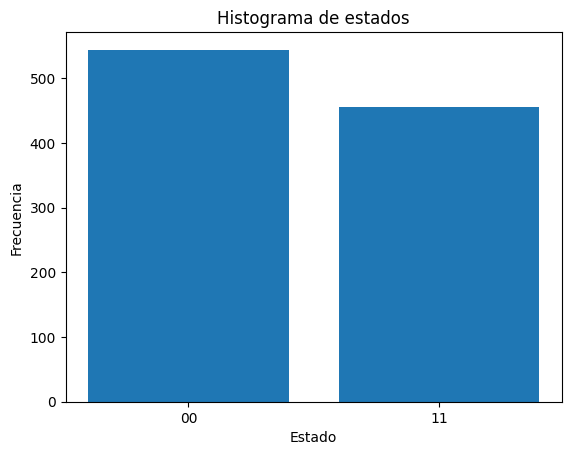

In [509]:
# We can also simplify it to not display empty results by getting counts
counts = bell_result.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.xticks([0, 1], ["00","11"])
plt.ylabel("Frecuencia")
plt.xlabel("Estado")
plt.title("Histograma de estados")
plt.show()

# 🔹 **10. Funciones Avanzadas**

### Cirq ofrece funcionalidades avanzadas, tales como:

### - **Parameter Sweeps:** Ejecución de circuitos con parámetros variables.
### - **Unitary Matrices:** Cálculo de la matriz unitaria de un circuito.
### - **Decompositions:** Descomposición de un circuito en compuertas más simples.

### Una vez que el circuito esté completo puedes rellenar los posibles valores de cada uno de estos parámetros con un `Sweep`.  Existen varias posibilidades que se pueden utilizar como un sweep:

*   `cirq.Points`: Una lista de valores especificados manualmente para un símbolo específico como una secuencia de números flotantes.
*   `cirq.Linspace`: Un rango lineal desde un valor inicial hasta un valor final
*   `cirq.ListSweep`: Una lista de valores especificados manualmente para varios símbolos diferentes, especificados como una lista de diccionarios.
*   `cirq.Zip` y `cirq.Product`: Los sweeps se pueden combinar de manera lista a lista mediante zip o a través de su producto cartesiano.


### Un circuito parametrizado y un sweep juntos se pueden ejecutar usando el simulador u otro muestreador cambiando `run()` por `run_sweep()` y añadiendo el sweep como un parámetro.








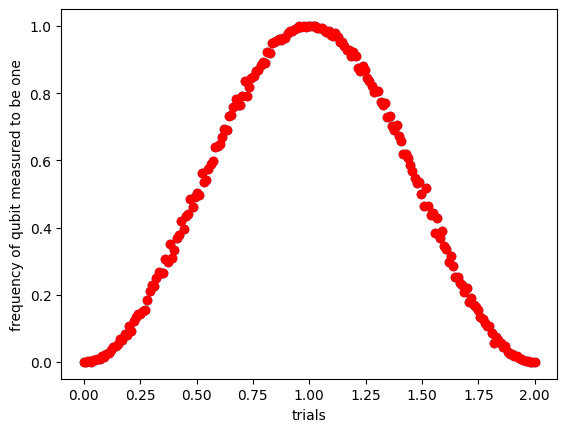

In [510]:
import sympy

# Aplicar un X gate con un parámetro simbólico t exponencial
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Cambiar el valor del parámetro 
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simular el circuito con diferentes valores del parámetro
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot de los resultados
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data}, color='r')
plt.show()

## 🔹 **10.1 Matrices Unitarias**
### Crear matrices unitarias a partir de circuitos

In [511]:

print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## 🔹 **10.2 Descomposiciones**
### Podemos descomponer circuitos en Gates más simples
### Ejemplo de descomposición de la Hadamard Gate

In [512]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


### Es útil para descomponer circuitos con 3 Qubits pues por lo general el hardware actual solo soporta 2 Qubits

Original:


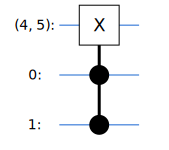

Descomposición:


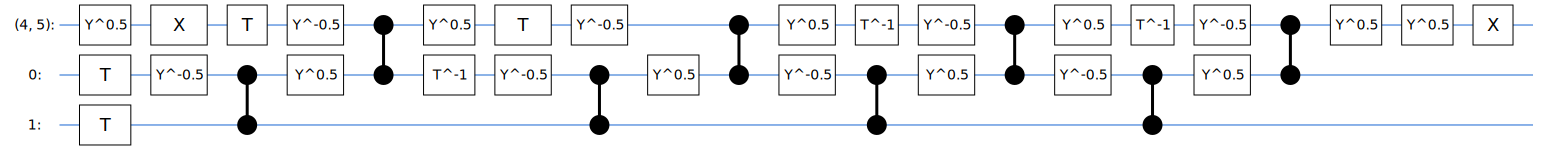

In [513]:
print("Original:")
display(SVGCircuit(cirq.Circuit(cirq.TOFFOLI(q0, q1, q2))))
print("Descomposición:")
SVGCircuit(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

# 🔹 **11. Transformers**

## Los transformers permite modificar circuitos
### Podemos combinar u optimizar gates en un circuito
### Ejemplo: Combinar dos Hadamard HAtes en una

In [514]:
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q0))
print("Original circuit:")
print(circuit)

# Combinación
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q0))
circuit = cirq.HPowGate(exponent=2).on(q0)
print("Combined circuit:")
print(circuit)


Original circuit:
0: ───H───H───
Combined circuit:
H**2(q(0))


### Podemos combinar puertas de un solo qubit en una sola puerta 
### El transformador `cirq.merge_single_qubit_gates_to_phxz` tomará operaciones consecutivas de un solo qubit y las combinará en una sola operación PhasedXZ.

In [515]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print("\nOriginal:")
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print("Combinación:")
print(c)



Original:
(1, 1): ───X^0.25───Y^0.25───T───
Combinación:
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───
